<a href="https://colab.research.google.com/github/mygit4075/Algos/blob/master/M2_NB_MiniProject_1_LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
###########################################
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from scipy.linalg import lstsq  # For normal equation

### Data Loading

In [ ]:
# Read the hour.csv file
# YOUR CODE HERE
df_hour=pd.read_csv("hour.csv")

print the first five rows of dataset

In [ ]:
# YOUR CODE HERE
dfHr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [ ]:
# YOUR CODE HERE
dfHr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

<Axes: xlabel='hr', ylabel='count'>

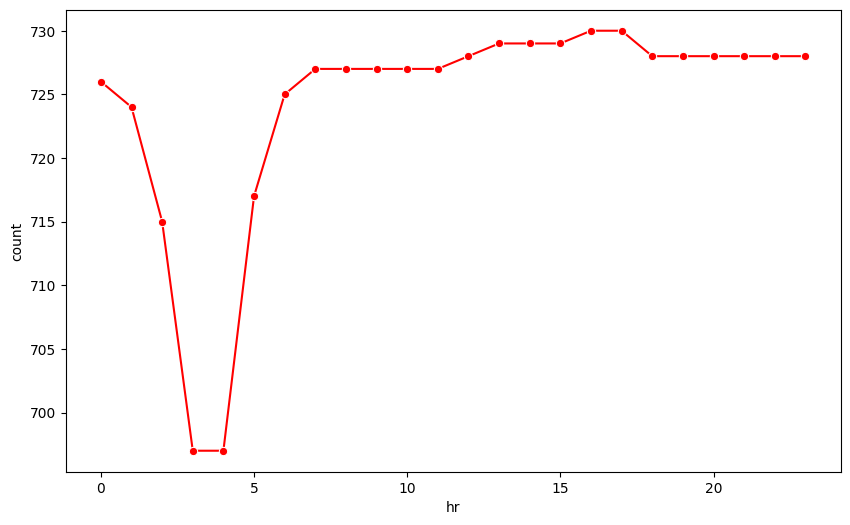

In [ ]:
# YOUR CODE HERE
#Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing
df=dfHr[['hr']]
#Create histogram fron df
plt.figure(figsize=(10, 6))
#sns.histplot(df, bins=24, kde=False, color='blue')
sns.lineplot(data=df['hr'].value_counts(sort=False), marker='o', color='red')

#Now dividing the hr into different times
#df['time_period'] = pd.cut(df['hr'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)
#sns.countplot(x='time_period', data=df, palette='viridis')

#### Visualize the distribution of count, casual and registered variables

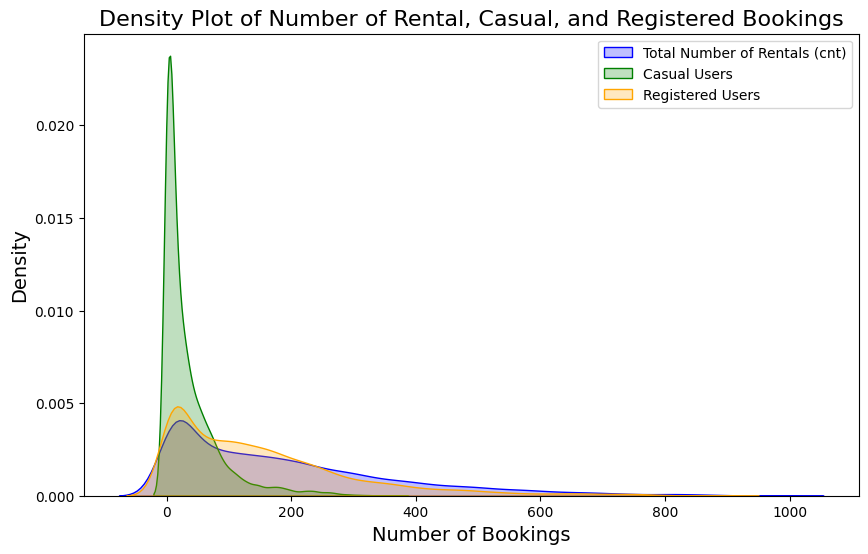

In [ ]:
# YOUR CODE HERE for distribuiton of count variable
plt.figure(figsize=(10, 6))
sns.kdeplot(dfHr['cnt'], label='Total Number of Rentals (cnt)', color='blue', fill=True)
sns.kdeplot(dfHr['casual'], label='Casual Users', color='green', fill=True)
sns.kdeplot(dfHr['registered'], label='Registered Users', color='orange', fill=True)

plt.title('Density Plot of Number of Rental, Casual, and Registered Bookings', fontsize=16)
plt.xlabel('Number of Bookings', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()


In [ ]:
dfHr[['casual', 'registered']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'orange'])

plt.title('Stacked Bar Chart of Bookings', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.legend(['Casual', 'Registered'])
plt.show()

<B>Observations:
Shape of the Distributions </B>

The green curve (casual users) shows a strong peak near lower booking values (close to 0) and tapers off quickly. This indicates that most casual users rent cycles in low quantities.
The orange curve (registered users) is more spread out compared to casual users, indicating higher and more consistent booking counts across a wider range.
The blue curve (cnt, total rentals) integrates the contributions from both casual and registered users, showing a broader distribution.
Overlap of Distributions:

The total bookings (cnt) are influenced more by registered users because the orange curve aligns closely with the blue curve. This suggests that the majority of total bookings are from registered users.
The casual users (green curve) contribute significantly only at lower booking values.
Density Peaks:

The density peak for casual users is much sharper and occurs near 0. This indicates that casual bookings are infrequent or limited.
The registered users' peak occurs at higher values than casual users, reflecting their larger and more consistent contribution to the total count.
Skewness:

All distributions appear positively skewed, meaning there are fewer instances of higher booking counts compared to lower ones.
Insights:
Casual vs Registered Contribution: Registered users are the primary contributors to total bookings, as evident from the similarity in the orange and blue curves.

Targeting Strategies:

Efforts to increase bookings might focus on casual users, as they tend to book in smaller numbers and could potentially grow with targeted marketing or promotions.
Registered users already form a reliable base and likely account for most of the revenue.
Outliers or High Values: There is a slight density at high values for total bookings (cnt), which could indicate special events or peak days causing increased demand.

The chart shown is a stacked bar chart depicting the contributions of casual and registered users to the total number of bookings over a series of indices (likely time periods or events). Here's the interpretation:

Observations:
Registered Users Dominate:

The orange bars (registered users) are consistently taller than the green bars (casual users) throughout the chart. This indicates that registered users contribute significantly more to the total bookings compared to casual users.
Casual Users' Contribution:

The green bars are present for all indices but remain relatively short. This suggests that casual users consistently make bookings, but their volume is low compared to registered users.
Variation Over Time:

The total height of the stacked bars varies widely across indices. This indicates fluctuation in the total number of bookings over time.
Some indices have very high total bookings, likely due to events, holidays, or peak seasons.
Seasonal Peaks:

Certain indices have unusually tall bars, reflecting peaks in demand. The contributions from both casual and registered users increase during these periods, but registered users are the primary contributors to the peaks.
Insights:
Business Strategy:

Focus on increasing casual users' bookings could help balance the contribution from both user types.
Events or promotions during peak periods could further amplify overall bookings.
Behavioral Patterns:

Registered users appear to have consistent engagement, as seen by their dominant and stable contribution across indices.
Casual users might reflect sporadic or situational engagement, potentially driven by external factors like weather or holidays.
Data Trends:

The variability in total bookings indicates the potential for understanding time-series patterns or seasonality in demand.

In [ ]:
# YOUR CODE HERE for distribuiton of casual variable
# Histogram for Casual Variable
plt.figure(figsize=(10, 6))
plt.hist(dfHr['casual'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Casual Bookings', fontsize=16)
plt.xlabel('Number of Casual Bookings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Density Plot for Casual Variable
plt.figure(figsize=(10, 6))
sns.kdeplot(dfHr['casual'], color='green', fill=True)
plt.title('Density Plot of Casual Bookings', fontsize=16)
plt.xlabel('Number of Casual Bookings', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# YOUR CODE HERE for distribuiton of registered variable
# Histogram for Registered Variable
plt.figure(figsize=(10, 6))
plt.hist(dfHr['registered'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histogram of Registered Bookings', fontsize=16)
plt.xlabel('Number of Registered Bookings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Density Plot for Registered Variable
plt.figure(figsize=(10, 6))
sns.kdeplot(dfHr['registered'], color='blue', fill=True)
plt.title('Density Plot of Registered Bookings', fontsize=16)
plt.xlabel('Number of Registered Bookings', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Describe the relation of weekday, holiday and working day

In [ ]:
# YOUR CODE HERE
# Select the relevant features and target variable
selected_features = df['weekday', 'holiday', 'workingday']
target = 'cnt'

# Compute the correlation values
correlation_with_cnt = dfHr[selected_features + [target]].corr()[target]

# Drop the target variable itself for clarity
correlation_with_cnt = correlation_with_cnt.drop(target)

# Display the correlation values
print("Correlation of weekday, holiday, and workingday with cnt:")
print(correlation_with_cnt)

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

In [ ]:
# stacked bar chart for year 2011
# YOUR CODE HERE
import matplotlib.pyplot as plt
import pandas as pd


# Replace the year values for readability
dfHr['yr'] = dfHr['yr'].replace({0: 2011, 1: 2012})

# Filter data for 2011 and 2012
df_2011 = dfHr[dfHr['yr'] == 2011]
df_2012 = dfHr[dfHr['yr'] == 2012]

# Aggregate data by month
monthly_data_2011 = df_2011.groupby('mnth')[['casual', 'registered']].sum().reset_index()
monthly_data_2012 = df_2012.groupby('mnth')[['casual', 'registered']].sum().reset_index()

# Function to plot stacked bar chart
def plot_stacked_monthly_data(data, year):
    plt.figure(figsize=(12, 6))

    # Stacked bar chart
    plt.bar(data['mnth'], data['casual'], label='Casual', color='skyblue', edgecolor='black')
    plt.bar(data['mnth'], data['registered'], bottom=data['casual'], label='Registered', color='orange', edgecolor='black')

    # Add labels and title
    plt.xticks(data['mnth'], labels=range(1, 13))
    plt.title(f'Monthly Count of Casual and Registered Bookings (Stacked) in {year}', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Count of Bookings', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Plot for 2011
plot_stacked_monthly_data(monthly_data_2011, 2011)




In [ ]:
# stacked bar chart for year 2012
# YOUR CODE HERE
# Plot for 2012
plot_stacked_monthly_data(monthly_data_2012, 2012)

#### Analyze the correlation between features with heatmap

In [ ]:
# YOUR CODE HERE
dfHr_data_corr = dfHr.drop(['dteday'],axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(dfHr_data_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Features in dfHr')
plt.show()



#### Visualize the box plot of casual and registered variables to check the outliers

 registered vs cnt(0.97),temp vs atemp(0.99), month vs season (0.83), instant vs year (0.87)

In [ ]:
# YOUR CODE HERE
#dfHr.boxplot(column=['casual', 'registered'])

plt.figure(figsize=(12, 6))

# Plot boxplot for 'casual'
plt.subplot(1, 2, 1)
sns.boxplot(y=dfHr['casual'], color='skyblue')
plt.title('Box Plot of Casual Variable')
plt.ylabel('Count')
plt.xlabel('Casual')

# Plot boxplot for 'registered'
plt.subplot(1, 2, 2)
sns.boxplot(y=dfHr['registered'], color='lightgreen')
plt.title('Box Plot of Registered Variable')
plt.ylabel('Count')
plt.xlabel('Registered')

# Show the plots
plt.tight_layout()
plt.show()

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [ ]:
# YOUR CODE HERE
# registered vs cnt(0.97),temp vs atemp(0.99), month vs season (0.83), instant vs year (0.87)
#cnt is a calculted filed and when required we can get it
dfHr.drop(['temp'], axis=1, inplace=True)

#### Identify categorical and continuous variables


In [ ]:
# YOUR CODE HERE
# Identify categorical variables (typically dtype 'object' or limited unique values)
categorical_variables = dfHr.select_dtypes(include=['object', 'category']).columns.tolist()

# Add numerical variables with few unique values (likely categorical)
for col in dfHr.select_dtypes(include=['int64', 'float64']).columns:
    if dfHr[col].nunique() < 10:  # Arbitrary threshold for categorical features
        categorical_variables.append(col)

# Identify continuous variables (numeric and not categorical)
continuous_variables = [
    col for col in dfHr.select_dtypes(include=['int64', 'float64']).columns
    if col not in categorical_variables
]

# Display results
print("Categorical Variables:", categorical_variables)
print("Continuous Variables:", continuous_variables)

#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the continuous variables
continuous_vars =  ['instant', 'mnth', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Fit the scaler to the continuous variables
scaler.fit(dfHr[continuous_vars])

# Transform the continuous variables
dfHr[continuous_vars] = scaler.transform(dfHr[continuous_vars])
print("Normalized data : " , dfHr[continuous_vars])

#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [ ]:
# YOUR CODE HERE
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming your categorical variables are:
categorical_vars = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Create a OneHotEncoder object with sparse=False for a dense output
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for DataFrame output

# Fit the encoder to the categorical variables
encoder.fit(dfHr[categorical_vars])

# Transform the categorical variables into one-hot encoded features
encoded_features = encoder.transform(dfHr[categorical_vars])

# Create a DataFrame from the encoded features with appropriate column names
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_vars))

# Concatenate the encoded features with the original DataFrame
dfHr = pd.concat([dfHr, encoded_df], axis=1)

# Drop the original categorical columns
dfHr.drop(categorical_vars, axis=1, inplace=True)

#By using one-hot encoding, we are creating a numerical representation of categorical
#variables without introducing any artificial ordering or weighting.
#This is crucial for many machine learning algorithms that work best with numerical data.

In [ ]:
print(categorical_vars)
dfHr.columns
dfHr.head()

#### Specify features and targets after applying scaling and one-hot encoding

In [ ]:
# YOUR CODE HERE
# Assuming 'casual' and 'registered' are NOT your target variables
# and all other columns EXCEPT 'dteday' are your features
features = dfHr.drop(['dteday', 'casual', 'registered'], axis=1)
target = dfHr[['casual', 'registered', 'cnt']]  # Or dfHr['cnt'] if you have 'cnt'

# If 'casual' and 'registered' ARE your target variables:
# features = dfHr.drop(['dteday', 'casual', 'registered'], axis=1)
# target = dfHr[['casual', 'registered']]

print(features)
print("================")
print(target)

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
# YOUR CODE HERE
from scipy.linalg import lstsq  # For normal equation
# 1. Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target['cnt'], test_size=0.2, random_state=42
)  # Adjust test_size and random_state as needed


# 2. Find coefficients using the normal equation
# theta = (X^T X)^-1 * X^T * y
theta, _, _, _ = lstsq(X_train.values, y_train.values)  # Using lstsq from scipy.linalg

# Print the coefficients
print("Coefficients (Normal Equation):", theta)


# (Optional) 3. Implement batch gradient descent
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    """
    Performs batch gradient descent to find optimal coefficients.

    Args:
        X: Input features (NumPy array).
        y: Target variable (NumPy array).
        learning_rate: Learning rate for gradient descent.
        iterations: Number of iterations to run.

    Returns:
        theta: Optimal coefficients (NumPy array).
    """
    m = len(y)  # Number of samples
    theta = np.zeros(X.shape[1])  # Initialize coefficients

    for _ in range(iterations):
        # Calculate predictions
        predictions = X.dot(theta)

        # Calculate error
        error = predictions - y

        # Update coefficients
        gradient = (1 / m) * X.T.dot(error)
        theta = theta - learning_rate * gradient

    return theta

# # Example usage:
# theta_bgd = batch_gradient_descent(X_train.values, y_train.values)
# print("Coefficients (Batch Gradient Descent):", theta_bgd)


# (Optional) 4. SGD Regressor from sklearn
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_regressor.fit(X_train, y_train)

# Print the coefficients
print("Coefficients (SGD Regressor):", sgd_regressor.coef_)

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
# YOUR CODE HERE
import numpy as np
from scipy.linalg import lstsq

# Assuming you have X_train (features) and y_train (target)
# from the previous code (splitting the dataset)

# Calculate the coefficients using the normal equation
theta, residuals, rank, singular_values = lstsq(X_train, y_train)

# Print the coefficients
print("Coefficients (Normal Equation):", theta)

# You can now use these coefficients to make predictions:
# predictions = X_test.dot(theta)

#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Multivariate%20Linear%20Regression.pdf)

In [ ]:
# YOUR CODE HERE
import numpy as np

def batch_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    """
    Performs batch gradient descent to find optimal coefficients.

    Args:
        X: Input features (NumPy array).
        y: Target variable (NumPy array).
        learning_rate: Learning rate for gradient descent.
        iterations: Number of iterations to run.

    Returns:
        theta: Optimal coefficients (NumPy array).
        cost_history: List of cost values during iterations.
    """
    m = len(y)  # Number of samples
    theta = np.random.randn(X.shape[1])  # Initialize coefficients randomly
    cost_history = []

    for _ in range(iterations):
        # Calculate predictions
        predictions = X.dot(theta)

        # Calculate error
        error = predictions - y

        # Calculate cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(error**2)
        cost_history.append(cost)

        # Update coefficients
        gradient = (1 / m) * X.T.dot(error)
        theta = theta - learning_rate * gradient

    return theta, cost_history

# Example usage:
# X = X_train.values  # Assuming X_train is your features DataFrame
# y = y_train.values  # Assuming y_train is your target Series
# theta_bgd, cost_history = batch_gradient_descent(X, y)
# print("Coefficients (Batch Gradient Descent):", theta_bgd)

# You can plot the cost history to see how it decreases over iterations:
# import matplotlib.pyplot as plt
# plt.plot(cost_history)
# plt.xlabel("Iteration")
# plt.ylabel("Cost")
# plt.title("Cost History")
# plt.show()

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
# YOUR CODE HERE


### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have X_train, X_test, y_train, y_test from previous steps

# 1. Create a Linear Regression object
model = LinearRegression()

# 2. Fit the model to the training data
model.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred = model.predict(X_test)

# 4. Calculate the error (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import r2_score

# Assuming you have y_test (actual values) and y_pred (predicted values)

r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your trained LinearRegression object

# Get feature names and coefficients
feature_names = X_train.columns
coefficients = model.coef_

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(feature_names, coefficients)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


# Sort features by importance (absolute value of coefficients)
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Print features in order of importance
print("Features in order of importance:")
for feature, coefficient in zip(sorted_features, sorted_coefficients):
    print(f"{feature}: {coefficient:.4f}")

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have X_train, X_test, y_train, y_test from previous steps
# and 'alpha' is a list of alpha values to try

# Initialize variables to store best results
best_alpha = None
best_mse = float('inf')  # Initialize with a very large value
best_r2 = -1  # Initialize with a very small value

# Iterate through alpha values
for alpha_val in alpha:
    # Create a Lasso Regression object
    lasso_model = Lasso(alpha=alpha_val)

    # Fit the model to the training data
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = lasso_model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

In [ ]:
# YOUR CODE HERE

#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
# YOUR CODE HERE

#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
# YOUR CODE HERE

### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
